In [1]:
import pandas as pd
import json
import os 

os.getcwd()
os.chdir("/Users/romeeisabellesteijns/Desktop/Machine Learning/Group Project")

# Load the data from train.json
with open('train (1).json', 'r') as f:
    train_data = json.load(f)

# Create a DataFrame from the loaded JSON data
df_train = pd.DataFrame(train_data)

# Display the DataFrame
print(df_train.head())

       ENTRYTYPE                                              title editor  \
0  inproceedings  Philippine Language Resources: Trends and Dire...   None   
1  inproceedings  A System for Translating Locative Prepositions...   None   
2  inproceedings  Introduction to the Shared Task on Comparing S...   None   
3  inproceedings  Pynini: A Python library for weighted finite-s...   None   
4  inproceedings  Improving Readability of Swedish Electronic He...   None   

   year                                  publisher  \
0  2009  Association for Computational Linguistics   
1  1991  Association for Computational Linguistics   
2  2008                       College Publications   
3  2016  Association for Computational Linguistics   
4  2014  Association for Computational Linguistics   

                                              author abstract  
0  [Roxas, Rachel Edita, Cheng, Charibeth, Lim, N...     None  
1            [Japkowicz, Nathalie, Wiebe, Janyce M.]     None  
2             

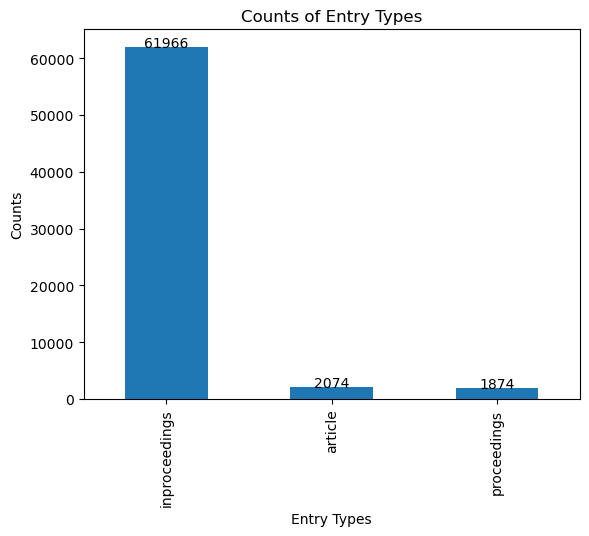

In [2]:
import matplotlib.pyplot as plt

counts_plot = df_train['ENTRYTYPE'].value_counts().plot(kind = 'bar')
# Add labels and title
plt.xlabel('Entry Types')
plt.ylabel('Counts')
plt.title('Counts of Entry Types')

# Add counts on top of the bars
for i in counts_plot.patches:
    # get_x pulls left or right; get_height pushes up or down
    counts_plot.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center')

# Show the plot
plt.show()

# 1. Inproceedings:  individual papers or articles that are included within the compiled conference proceedings. 
# These papers are typically presented at the conference and later included in the published proceedings.

# 2. Article: a standalone piece of research that has undergone the traditional peer-review process and has been 
# published independently in a journal or other publication.

# 3. Proceedings: represents the compilation of papers, abstracts, and materials from a specific conference or 
# academic event, often published as a collective volume.

# These three categories likely reflects the classification system used in the context of academic publishing, 
# particularly in fields such as computer science and engineering.

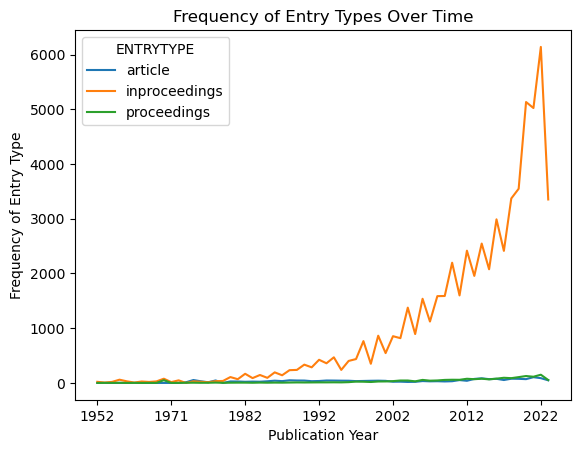

In [3]:
df_pivot = df_train.pivot_table(index='year', columns='ENTRYTYPE', aggfunc='size', fill_value=0)

# Create a line plot
df_pivot.plot(kind='line')

# Add labels and title
plt.xlabel('Publication Year')
plt.ylabel('Frequency of Entry Type')
plt.title('Frequency of Entry Types Over Time')

# Show the plot
plt.show()

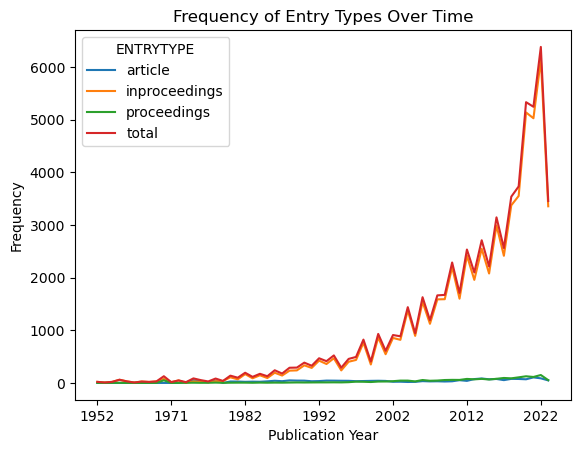

In [4]:
# Create a pivot table to restructure the data
df_pivot = df_train.pivot_table(index='year', columns='ENTRYTYPE', aggfunc='size', fill_value=0)

# Calculate the total
df_pivot['total'] = df_pivot.sum(axis=1)

# Create a line plot with the total
df_pivot.plot(kind='line')

# Add labels and title
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.title('Frequency of Entry Types Over Time')

# Show the plot
plt.show()

In [5]:
!pip3 install gender-guesser

In [6]:
import gender_guesser.detector as gender
d = gender.Detector()

genders = []
for author_set in df_train['author'][:53]: 
    author_set_gender = []
    for author in author_set:
        author_set_gender.append(d.get_gender(author.split()[1]))
    genders.append(author_set_gender)


print(df_train['author'][52])
genders[52]

# Works as long as it does not encounter "None"

['Zhang, Wen']


['andy']

In [7]:
len("steijns, romee".split())

2

In [8]:
genders = []
for author_set in df_train['author']: 
    author_set_gender = []
    if author_set != None:
        for author in author_set:
            if len(author.split()) >= 2:
                first_names = author.split()[1]
            else:
                first_names = None

            if first_names != None:
                author_set_gender.append(d.get_gender(first_names))
            else:
                author_set_gender.append("unknown")
        genders.append(author_set_gender)
    else:
        genders.append(None)

In [9]:
# There is a potential problem; the get_gender function appears to be quite ethnocentric; it seems to work less well on non-Western names:
print(df_train['author'][55])
print(genders[55])

# vs.
print("\n")

print(df_train['author'][20])
print(genders[20])

# maybe we can use this to our advantage in some way; do find more western contributors at some point?

['Sha, Lei', 'Li, Sujian', 'Chang, Baobao', 'Sui, Zhifang', 'Jiang, Tingsong']
['andy', 'unknown', 'unknown', 'unknown', 'unknown']


['Petroni, Fabio', 'Piktus, Aleksandra', 'Fan, Angela', 'Lewis, Patrick', 'Yazdani, Majid', 'De Cao, Nicola', 'Thorne, James', 'Jernite, Yacine', 'Karpukhin, Vladimir', 'Maillard, Jean', 'Plachouras, Vassilis', 'Rocktäschel, Tim', 'Riedel, Sebastian']
['male', 'female', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male']


In [10]:
# see if there are equal lengths in a zipped list
author_name_list = list(df_train['author'])

for names, gender in zip(author_name_list, genders):
    if names != None or gender != None:
        if len(names) != len(gender):
            print(names, gender)

# We have as many genders as names! This is good.

In [11]:
# add gender column to dataframe:

df_train['author genders'] = genders
df_train.head()

,ENTRYTYPE,title,editor,year,publisher,author,abstract,author genders
0,inproceedings,Philippine Language Resources: Trends and Dire...,None,2009,Association for Computational Linguistics,"[Roxas, Rachel Edita, Cheng, Charibeth, Lim, N...",None,"[female, unknown, female]"
1,inproceedings,A System for Translating Locative Prepositions...,None,1991,Association for Computational Linguistics,"[Japkowicz, Nathalie, Wiebe, Janyce M.]",None,"[female, female]"
2,inproceedings,Introduction to the Shared Task on Comparing S...,None,2008,College Publications,"[Bos, Johan]",None,[male]
3,inproceedings,Pynini: A Python library for weighted finite-s...,None,2016,Association for Computational Linguistics,"[Gorman, Kyle]",None,[mostly_female]
4,inproceedings,Improving Readability of Swedish Electronic He...,None,2014,Association for Computational Linguistics,"[Grigonyte, Gintarė, Kvist, Maria, Velupillai,...",None,"[female, female, unknown, male]"


In [12]:
# create a column that contains the number of males, females, and unknowns on an article; maybe one for males, females, unknown

n_female_authors = []
n_male_authors = []
n_unknown_gender_authors = []
n_authors = []

for gender in df_train['author genders']:
    fem = 0
    mal = 0
    unk = 0

    if gender != None:
        for i in gender:
            if i == "female" or i == "mostly_female":
                fem += 1
            if i == "male" or i == "mostly_male":
                mal += 1
            if i == "unknown" or i == "andy":
                unk += 1
        n_female_authors.append(fem)
        n_male_authors.append(mal)
        n_unknown_gender_authors.append(unk)
        n_authors.append(fem + mal + unk)
        
    else:
        n_female_authors.append(None)
        n_male_authors.append(None)
        n_unknown_gender_authors.append(None)
        n_authors.append(None)

        

In [13]:
# Add columns that contain the number of f/m/unkown gender authors per article:
df_train['n female authors'] = n_female_authors
df_train['n male authors'] = n_male_authors
df_train['n gender unknown authors'] = n_unknown_gender_authors
df_train['n authors'] = n_authors

df_train.head()

,ENTRYTYPE,title,editor,year,publisher,author,abstract,author genders,n female authors,n male authors,n gender unknown authors,n authors
0,inproceedings,Philippine Language Resources: Trends and Dire...,None,2009,Association for Computational Linguistics,"[Roxas, Rachel Edita, Cheng, Charibeth, Lim, N...",None,"[female, unknown, female]",2.0,0.0,1.0,3.0
1,inproceedings,A System for Translating Locative Prepositions...,None,1991,Association for Computational Linguistics,"[Japkowicz, Nathalie, Wiebe, Janyce M.]",None,"[female, female]",2.0,0.0,0.0,2.0
2,inproceedings,Introduction to the Shared Task on Comparing S...,None,2008,College Publications,"[Bos, Johan]",None,[male],0.0,1.0,0.0,1.0
3,inproceedings,Pynini: A Python library for weighted finite-s...,None,2016,Association for Computational Linguistics,"[Gorman, Kyle]",None,[mostly_female],1.0,0.0,0.0,1.0
4,inproceedings,Improving Readability of Swedish Electronic He...,None,2014,Association for Computational Linguistics,"[Grigonyte, Gintarė, Kvist, Maria, Velupillai,...",None,"[female, female, unknown, male]",2.0,1.0,1.0,4.0


<Axes: xlabel='year', ylabel='n gender unknown authors'>

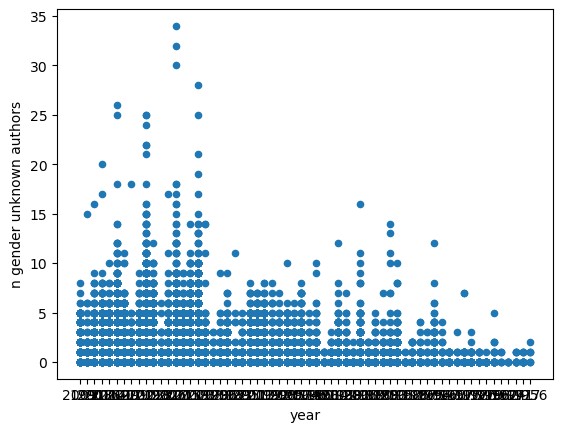

In [16]:
df_train.plot(x='year', y='n gender unknown authors', kind='scatter')

<Axes: xlabel='year', ylabel='n authors'>

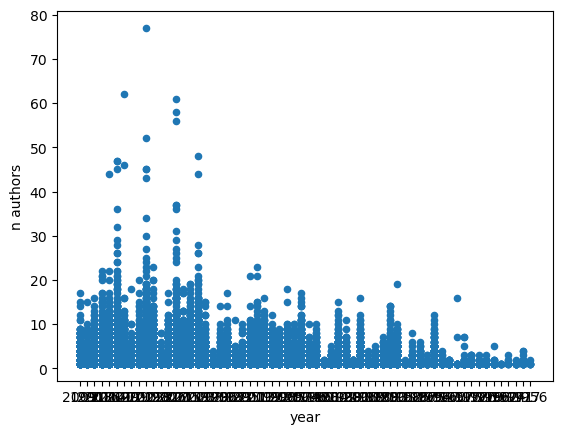

In [17]:
df_train.plot(x='year', y='n authors', kind='scatter')

<Axes: xlabel='year', ylabel='n female authors'>

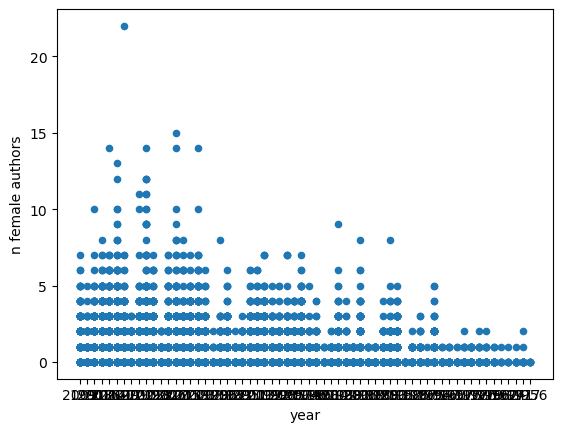

In [18]:
df_train.plot(x='year', y='n female authors', kind='scatter')

<Axes: xlabel='year', ylabel='n male authors'>

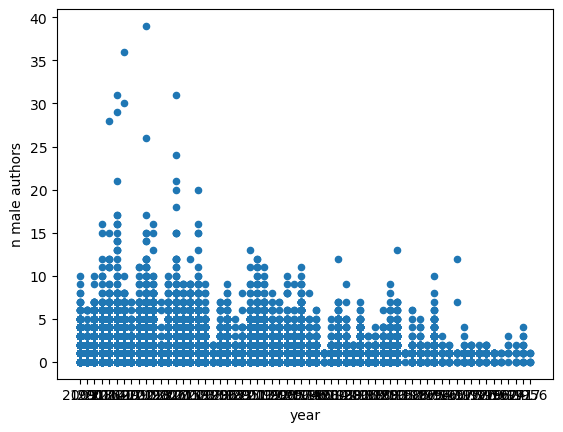

In [19]:
df_train.plot(x='year', y='n male authors', kind='scatter')

In [20]:
df_train.to_csv('updated new features.csv', index=False)

In [21]:
# create column that contains the number of authors with middle names:

n_authors_w_middle_names = []
for author_set in df_train['author']: 
    author_set_n_middle_names = []
    n = 0
    if author_set != None:
        for author in author_set:
            if "," in author: # if "," not in author, it does not even include first names
                if len(author.split(",")[1].split()) >= 2: # check if there are more than two first names
                    n += 1 # if yes add 1 to indicate that 1 additional author has a middle name
        n_authors_w_middle_names.append(n) # for each author set, append number of middle names
    else:
        n_authors_w_middle_names.append(None) # if there is no author, the value for n middle names should also be none


In [22]:
# include column in dataframe:
df_train['n authors w/ middle name'] = n_authors_w_middle_names

In [23]:
# note to self:
print("steijns, romee isabelle".split(",")[1].split())
print(len("steijns, romee isabelle".split(",")[1].split()) >= 2)

print("steijns, romee".split(",")[1].split())
print(len("steijns, romee".split(",")[1].split()) >= 2)

['romee', 'isabelle']
True
['romee']
False


In [24]:
df_train.to_csv('updated new features including n authors w middle names.csv', index=False)

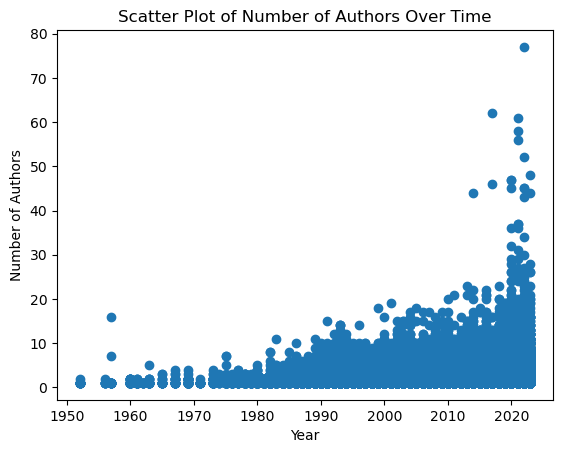

In [25]:
df_train.head()
# Assuming df_train is your DataFrame

# Convert the 'year' column to the appropriate data type (e.g., integer or datetime)
df_train['year'] = pd.to_numeric(df_train['year'])  # Change to_numeric to the appropriate data type conversion

# Sort the DataFrame by the 'year' column
df_train_sorted = df_train.sort_values('year')

# Creating the line plot with the sorted DataFrame
plt.scatter(df_train_sorted['year'], df_train_sorted['n authors'])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Authors')
plt.title('Scatter Plot of Number of Authors Over Time')

# Showing the plot
plt.show()